In [200]:
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()

plt.rc('font', family = font)
plt.rc('axes', unicode_minus=False)

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

ModuleNotFoundError: No module named 'fbprophet'

In [95]:
data = pd.read_csv("final_dataset.csv" )
data

,Unnamed: 0,year,month,date,emd_nm,em_g,total_pop,제주_resd_ratio,제주_resd_pop,visit_ratio,card_use_cnt,delivery_per_cnt,market_per_cnt,frgn_ratio,youth_ratio
0,0,2018,1,1,건입동,1708250,10028,0.552623,7274.890502,49.642958,1806.0,0.002769,0.326135,0.038427,0.200261
1,1,2018,1,1,남원읍,1239600,19740,0.704247,12143.821692,41.452047,1581.0,0.015813,0.294750,0.025900,0.177984
2,2,2018,1,1,노형동,9357900,54958,0.769356,50660.687565,25.674217,12507.0,0.009834,0.392180,0.039271,0.195624
3,3,2018,1,1,대륜동,1717700,13651,0.667224,11185.575639,42.502310,2032.0,0.009843,0.422736,0.014440,0.208504
4,4,2018,1,1,대정읍,1264950,22603,0.784751,16075.181182,28.652628,1973.0,0.017233,0.437912,0.053508,0.168114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50881,50881,2021,6,30,한경면,973850,9495,0.749118,7257.895822,35.350145,1286.0,0.031104,0.328927,0.042559,0.171578
50882,50882,2021,6,30,한림읍,3298100,24462,0.769060,20632.727912,35.614095,3044.0,0.084428,0.219777,0.048140,0.197206
50883,50883,2021,6,30,화북동,3749600,24630,0.705806,24117.268821,27.871984,5644.0,0.114103,0.291460,0.010642,0.167519
50884,50884,2021,6,30,효돈동,1011050,5314,0.744489,3726.154500,31.896263,714.0,0.021008,0.450980,0.014730,0.165783


#### 차이나는 행정동  

In [97]:
df = data[['year','month','date','emd_nm','visit_ratio','frgn_ratio','youth_ratio']]

In [98]:
for i in range(32):
    print("2021/6/{}" .format(i+1))
    print("행정동명 : ")
    print(df[(df.year ==2021) & (df.month == 6) & (df.date == i+1)].emd_nm.unique())
    print("행정동 수 : ")
    print(df[(df.year ==2021) & (df.month == 6) & (df.date == i+1)].emd_nm.value_counts().sum())

2021/6/1
행정동명 : 
['건입동' '구좌읍' '남원읍' '노형동' '대륜동' '대정읍' '대천동' '도두동' '동홍동' '봉개동' '삼도1동' '삼도2동'
 '삼양동' '서홍동' '성산읍' '송산동' '아라동' '안덕면' '애월읍' '연동' '영천동' '예래동' '오라동' '외도동'
 '용담1동' '용담2동' '이도1동' '이도2동' '이호동' '일도1동' '일도2동' '정방동' '조천읍' '중문동' '중앙동'
 '천지동' '표선면' '한경면' '한림읍' '화북동' '효돈동' '전체']
행정동 수 : 
42
2021/6/2
행정동명 : 
['건입동' '구좌읍' '남원읍' '노형동' '대륜동' '대정읍' '대천동' '도두동' '동홍동' '봉개동' '삼도1동' '삼도2동'
 '삼양동' '서홍동' '성산읍' '송산동' '아라동' '안덕면' '애월읍' '연동' '영천동' '예래동' '오라동' '외도동'
 '용담1동' '용담2동' '이도1동' '이도2동' '이호동' '일도1동' '일도2동' '정방동' '조천읍' '중문동' '중앙동'
 '천지동' '표선면' '한경면' '한림읍' '화북동' '효돈동' '전체']
행정동 수 : 
42
2021/6/3
행정동명 : 
['건입동' '구좌읍' '남원읍' '노형동' '대륜동' '대정읍' '대천동' '도두동' '동홍동' '봉개동' '삼도1동' '삼도2동'
 '삼양동' '서홍동' '성산읍' '송산동' '아라동' '안덕면' '애월읍' '연동' '영천동' '예래동' '오라동' '외도동'
 '용담1동' '용담2동' '이도1동' '이도2동' '이호동' '일도1동' '일도2동' '정방동' '조천읍' '중문동' '중앙동'
 '천지동' '표선면' '한경면' '한림읍' '화북동' '효돈동' '전체']
행정동 수 : 
42
2021/6/4
행정동명 : 
['건입동' '구좌읍' '남원읍' '노형동' '대륜동' '대정읍' '대천동' '도두동' '동홍동' '봉개동' '삼도1동' '삼도2동'
 '삼양동' '서홍동' '성산읍' '송산동' '아라동' '

In [99]:
a = df[(df.year ==2021) & (df.month == 6) & (df.date == 18)].emd_nm.unique()
b = df[(df.year ==2021) & (df.month == 6) & (df.date == 19)].emd_nm.unique()
print(set(a).difference(set(b))) 

{'일도1동'}


#### prophet

In [100]:
df

,year,month,date,emd_nm,visit_ratio,frgn_ratio,youth_ratio
0,2018,1,1,건입동,49.642958,0.038427,0.200261
1,2018,1,1,남원읍,41.452047,0.025900,0.177984
2,2018,1,1,노형동,25.674217,0.039271,0.195624
3,2018,1,1,대륜동,42.502310,0.014440,0.208504
4,2018,1,1,대정읍,28.652628,0.053508,0.168114
...,...,...,...,...,...,...,...
50881,2021,6,30,한경면,35.350145,0.042559,0.171578
50882,2021,6,30,한림읍,35.614095,0.048140,0.197206
50883,2021,6,30,화북동,27.871984,0.010642,0.167519
50884,2021,6,30,효돈동,31.896263,0.014730,0.165783


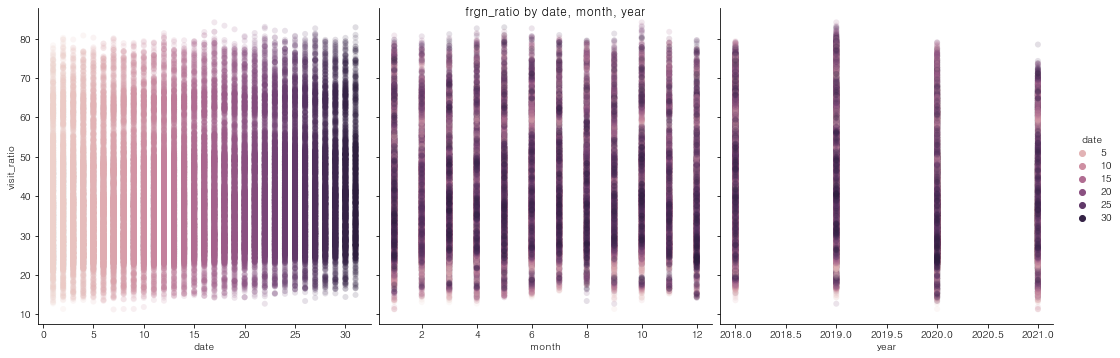

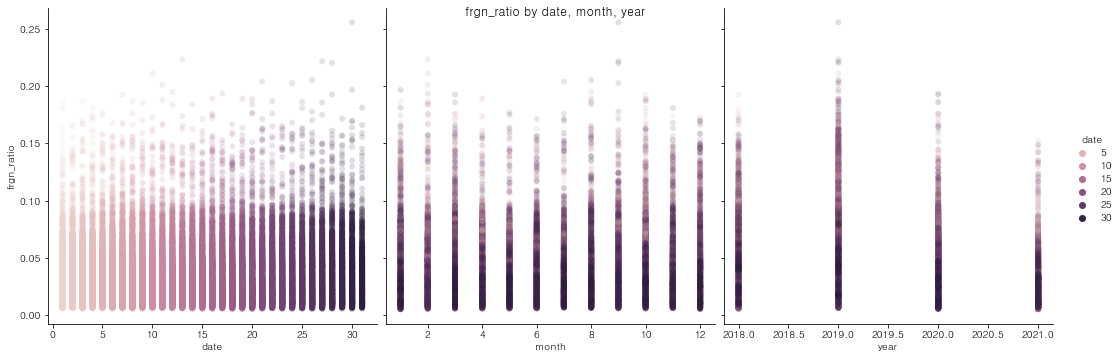

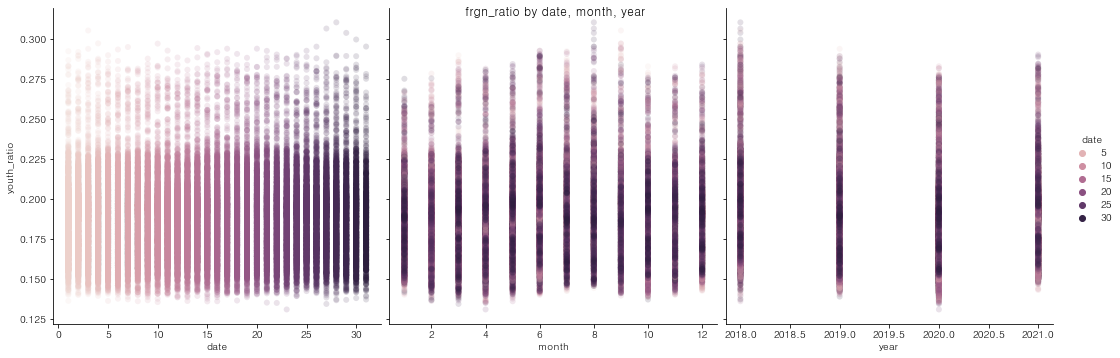

In [101]:
# plotting the features to see trends
list = ['visit_ratio' ,'frgn_ratio', 'youth_ratio']

for i in list:
    
    sns.pairplot(df,hue = 'date', x_vars=['date','month','year'], y_vars=i ,height = 5 ,
                         plot_kws={'alpha':0.15 , 'linewidth': 0})
    plt.suptitle('frgn_ratio by date, month, year')
    plt.show

In [102]:
df = df.astype({'year' : 'str'})
df = df.astype({'month' : 'str'})
df = df.astype({'date' : 'str'})

In [107]:
# 처음에 fmonth, fdate에 [i] 없이 돌리고 그 다음에 [i] 붙여서 만들기 왠지는 모르겠음 ㅜㅜ

for i in tqdm(range(0,len(df))):
    df['fmonth'][i] = df['month'][i].zfill(2)
    df['fdate'][i] = df['date'][i].zfill(2)

df

  0%|                                                                                        | 0/50886 [00:00<?, ?it/s]C:\Users\UserK\AppData\Local\Temp/ipykernel_5616/2502669455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fmonth'][i] = df['month'][i].zfill(2)
C:\Users\UserK\AppData\Local\Temp/ipykernel_5616/2502669455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fdate'][i] = df['date'][i].zfill(2)
100%|███████████████████████████████████████████████████████████████████████████| 50886/50886 [01:48<00:00, 469.91it/s]


,year,month,date,emd_nm,visit_ratio,frgn_ratio,youth_ratio,fmonth,fdate
0,2018,1,1,건입동,49.642958,0.038427,0.200261,01,01
1,2018,1,1,남원읍,41.452047,0.025900,0.177984,01,01
2,2018,1,1,노형동,25.674217,0.039271,0.195624,01,01
3,2018,1,1,대륜동,42.502310,0.014440,0.208504,01,01
4,2018,1,1,대정읍,28.652628,0.053508,0.168114,01,01
...,...,...,...,...,...,...,...,...,...
50881,2021,6,30,한경면,35.350145,0.042559,0.171578,06,30
50882,2021,6,30,한림읍,35.614095,0.048140,0.197206,06,30
50883,2021,6,30,화북동,27.871984,0.010642,0.167519,06,30
50884,2021,6,30,효돈동,31.896263,0.014730,0.165783,06,30


In [112]:
df['datetime'] = df['year']+'-'+df['fmonth']+'-'+df['fdate']
df

,year,month,date,emd_nm,visit_ratio,frgn_ratio,youth_ratio,fmonth,fdate,datetime
0,2018,1,1,건입동,49.642958,0.038427,0.200261,01,01,2018-01-01
1,2018,1,1,남원읍,41.452047,0.025900,0.177984,01,01,2018-01-01
2,2018,1,1,노형동,25.674217,0.039271,0.195624,01,01,2018-01-01
3,2018,1,1,대륜동,42.502310,0.014440,0.208504,01,01,2018-01-01
4,2018,1,1,대정읍,28.652628,0.053508,0.168114,01,01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...
50881,2021,6,30,한경면,35.350145,0.042559,0.171578,06,30,2021-06-30
50882,2021,6,30,한림읍,35.614095,0.048140,0.197206,06,30,2021-06-30
50883,2021,6,30,화북동,27.871984,0.010642,0.167519,06,30,2021-06-30
50884,2021,6,30,효돈동,31.896263,0.014730,0.165783,06,30,2021-06-30


In [116]:
df['datetime'] = df['datetime'].apply(lambda x : pd.to_datetime(str(x), format='%Y-%m-%d'))

In [120]:
ndf = df[['datetime','emd_nm','visit_ratio','frgn_ratio','youth_ratio']]

In [122]:
# datetime inedex 만들기

ndf.set_index(ndf['datetime'] , inplace = True)
ndf = ndf.drop('datetime',1)
ndf.head()

C:\Users\UserK\AppData\Local\Temp/ipykernel_5616/4230713206.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ndf = ndf.drop('datetime',1)


,emd_nm,visit_ratio,frgn_ratio,youth_ratio
datetime,,,,
2018-01-01,건입동,49.642958,0.038427,0.200261
2018-01-01,남원읍,41.452047,0.025900,0.177984
2018-01-01,노형동,25.674217,0.039271,0.195624
2018-01-01,대륜동,42.502310,0.014440,0.208504
2018-01-01,대정읍,28.652628,0.053508,0.168114


In [126]:
# visit_ratio

df = ndf[['emd_nm','visit_ratio']]
df

,emd_nm,visit_ratio
datetime,,
2018-01-01,건입동,49.642958
2018-01-01,남원읍,41.452047
2018-01-01,노형동,25.674217
2018-01-01,대륜동,42.502310
2018-01-01,대정읍,28.652628
...,...,...
2021-06-30,한경면,35.350145
2021-06-30,한림읍,35.614095
2021-06-30,화북동,27.871984


In [148]:
# train/test split

# split_date = '2021-05-31'
# df_train = df.loc[df.index <= split_date].copy()
# df_test = df.loc[df.index > split_date].copy()

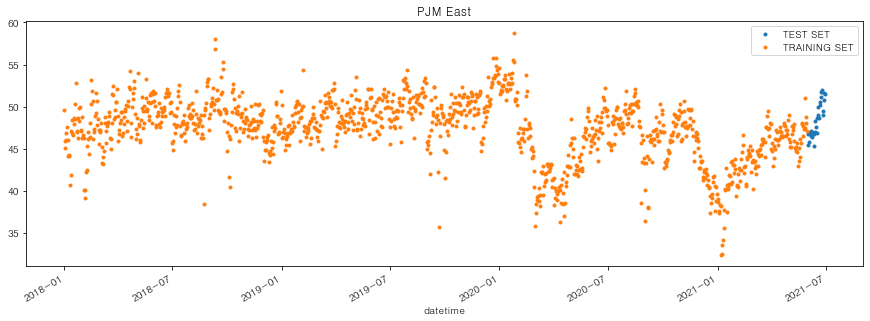

In [176]:
# Plot train and test so you can see where we have split  
a_test \
    .rename(columns={'visit_ratio': 'TEST SET'}) \
    .join(a_train.rename(columns={'visit_ratio': 'TRAINING SET'}),
          how='outer',  lsuffix='_left', rsuffix='_right') \
    .plot(figsize=(15,5), title='PJM East', style='.')
plt.show()

  0%|                                                                                           | 0/42 [00:00<?, ?it/s]

건입동


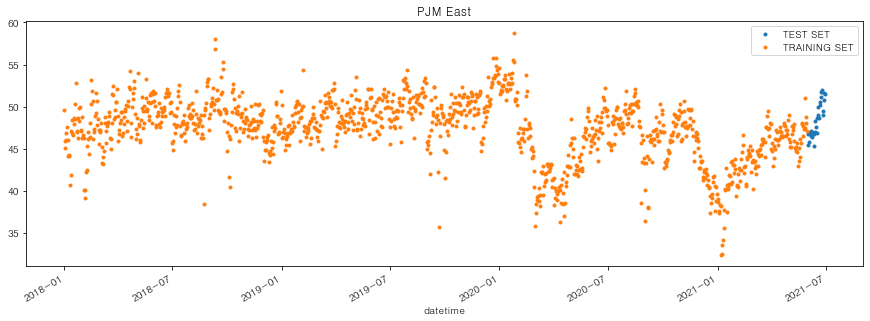

  2%|█▉                                                                                 | 1/42 [00:00<00:17,  2.39it/s]

남원읍


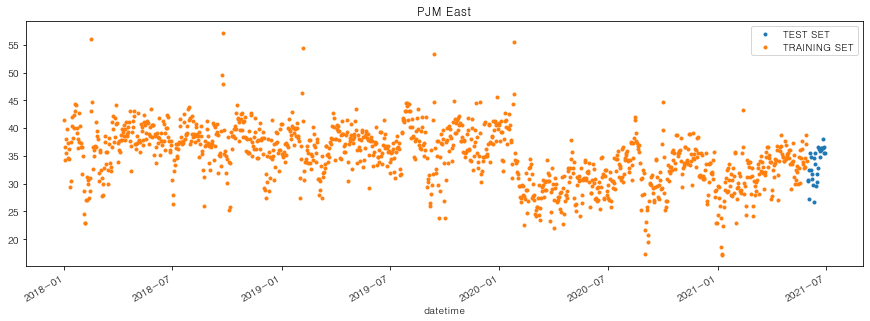

  5%|███▉                                                                               | 2/42 [00:00<00:17,  2.34it/s]

노형동


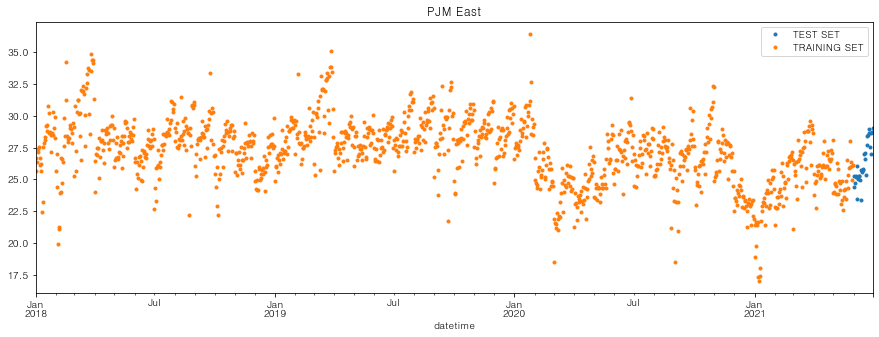

  7%|█████▉                                                                             | 3/42 [00:01<00:18,  2.06it/s]

대륜동


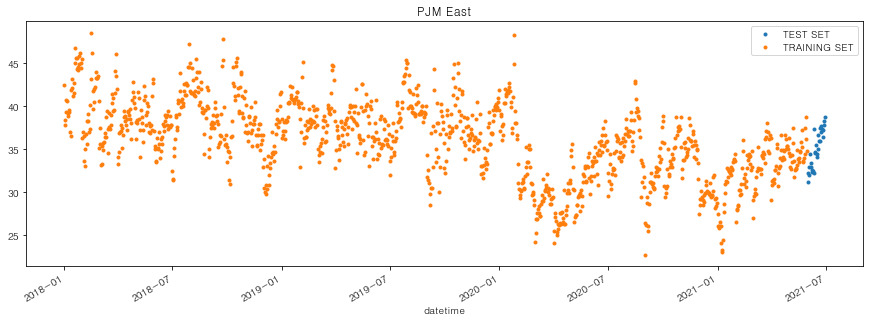

 10%|███████▉                                                                           | 4/42 [00:01<00:17,  2.18it/s]

대정읍


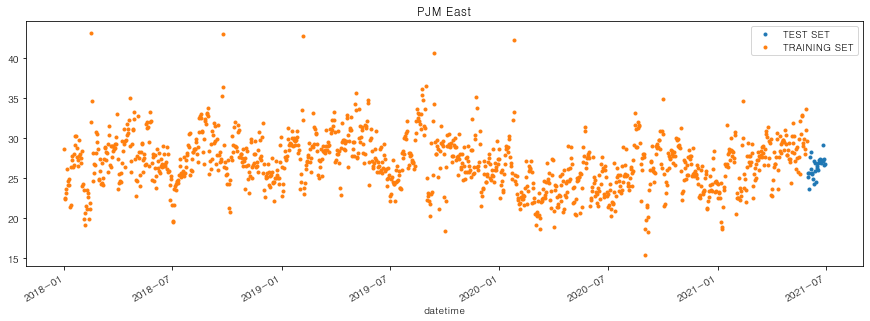

 12%|█████████▉                                                                         | 5/42 [00:02<00:17,  2.10it/s]

대천동


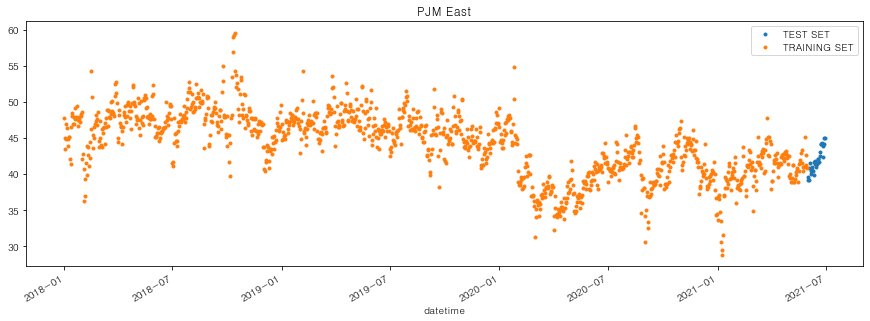

 14%|███████████▊                                                                       | 6/42 [00:02<00:16,  2.15it/s]

도두동


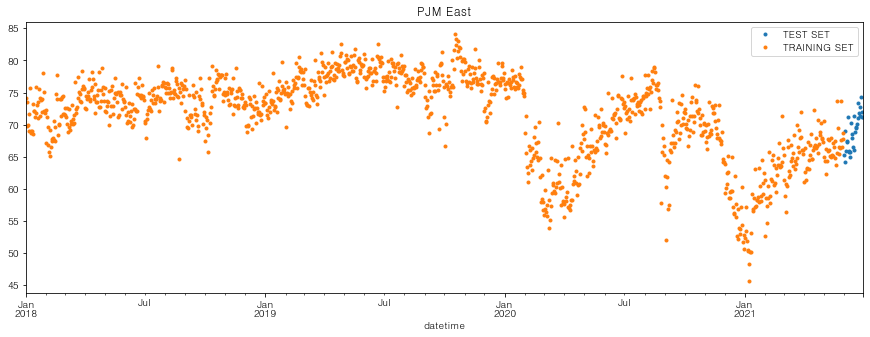

 17%|█████████████▊                                                                     | 7/42 [00:03<00:16,  2.06it/s]

동홍동


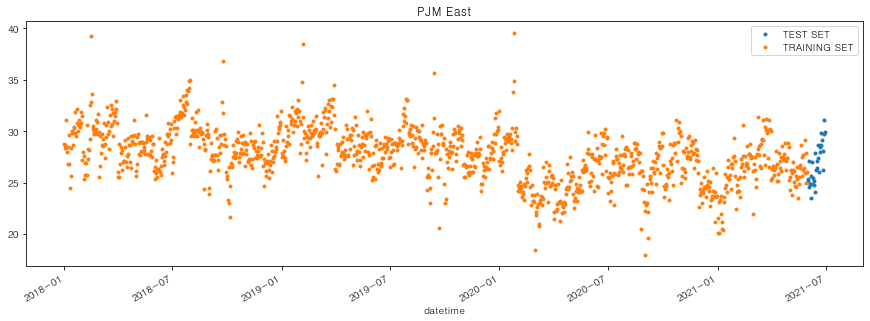

 19%|███████████████▊                                                                   | 8/42 [00:03<00:15,  2.15it/s]

봉개동


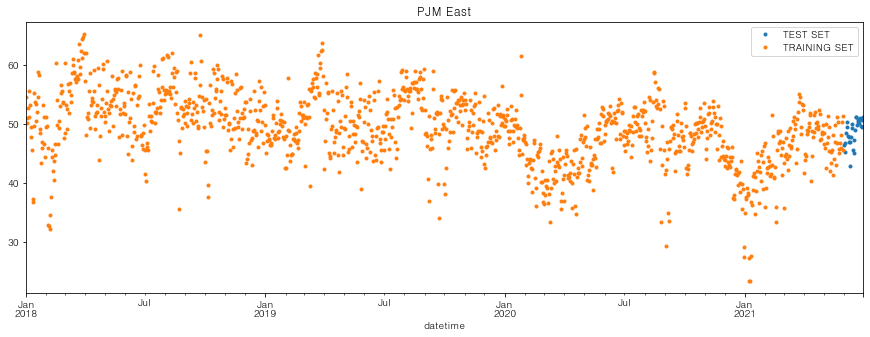

 21%|█████████████████▊                                                                 | 9/42 [00:04<00:15,  2.11it/s]

삼도1동


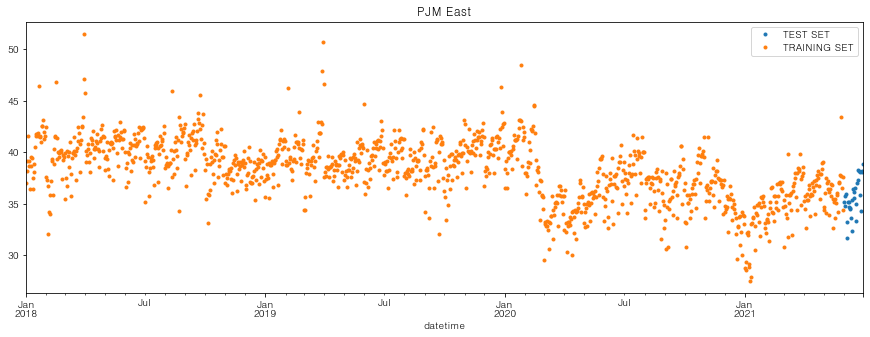

 24%|███████████████████▌                                                              | 10/42 [00:04<00:15,  2.06it/s]

삼도2동


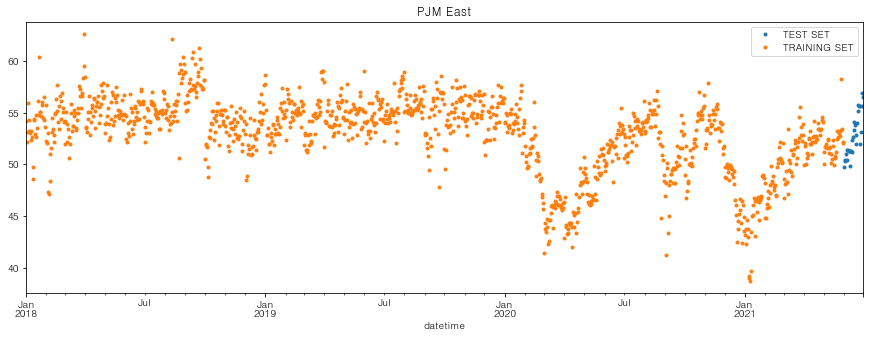

 26%|█████████████████████▍                                                            | 11/42 [00:05<00:15,  2.02it/s]

삼양동


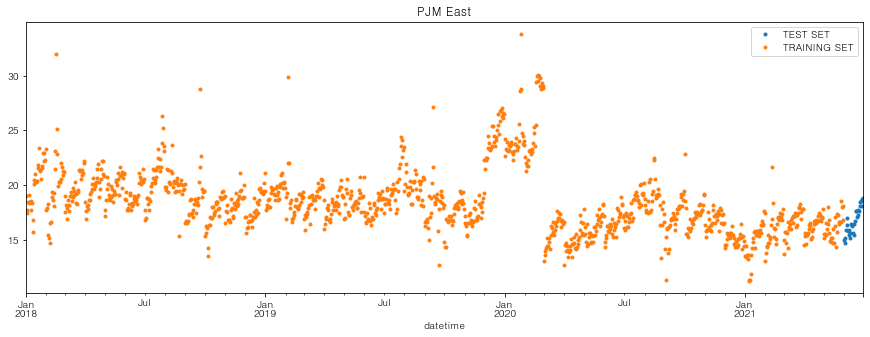

 29%|███████████████████████▍                                                          | 12/42 [00:05<00:15,  1.92it/s]

서홍동


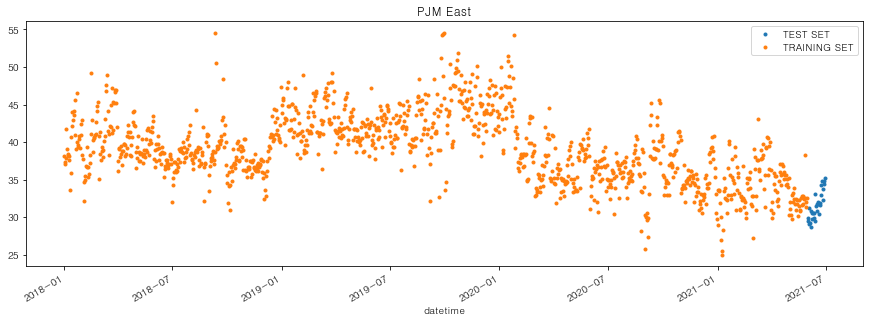

 31%|█████████████████████████▍                                                        | 13/42 [00:06<00:14,  2.03it/s]

성산읍


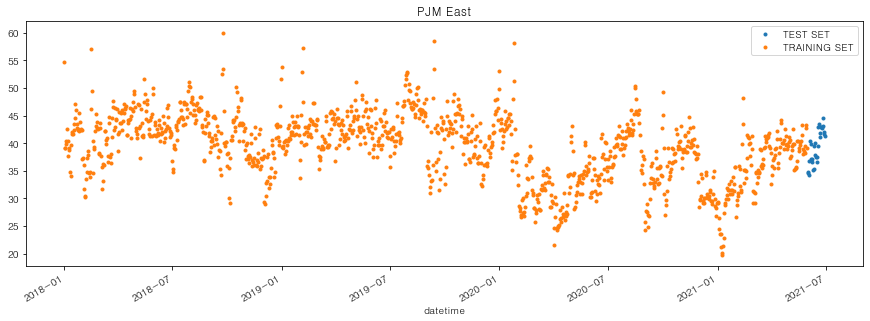

 33%|███████████████████████████▎                                                      | 14/42 [00:06<00:13,  2.10it/s]

송산동


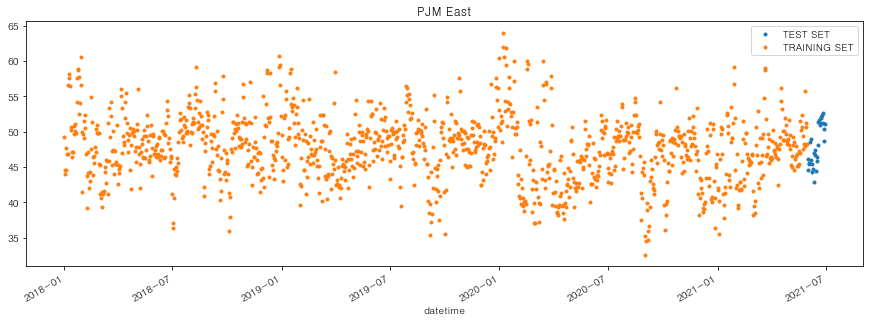

 36%|█████████████████████████████▎                                                    | 15/42 [00:07<00:12,  2.16it/s]

아라동


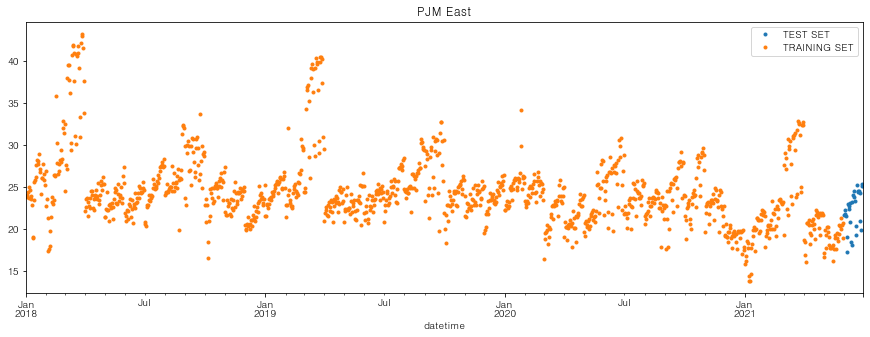

 38%|███████████████████████████████▏                                                  | 16/42 [00:07<00:12,  2.06it/s]

안덕면


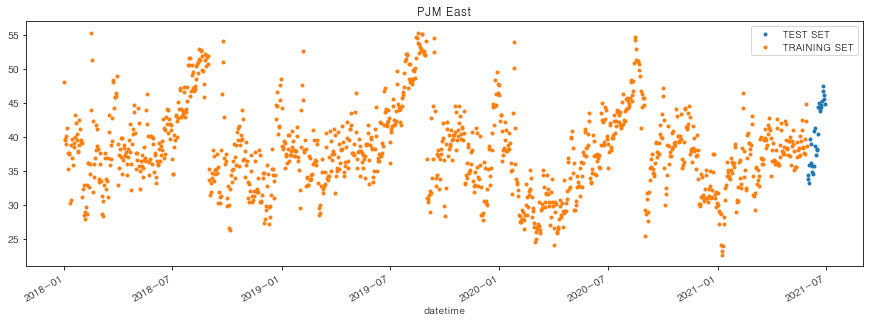

 40%|█████████████████████████████████▏                                                | 17/42 [00:08<00:11,  2.14it/s]

애월읍


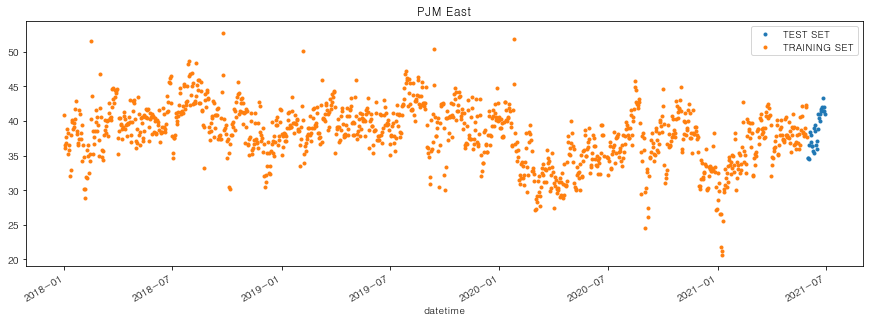

 43%|███████████████████████████████████▏                                              | 18/42 [00:08<00:10,  2.19it/s]

연동


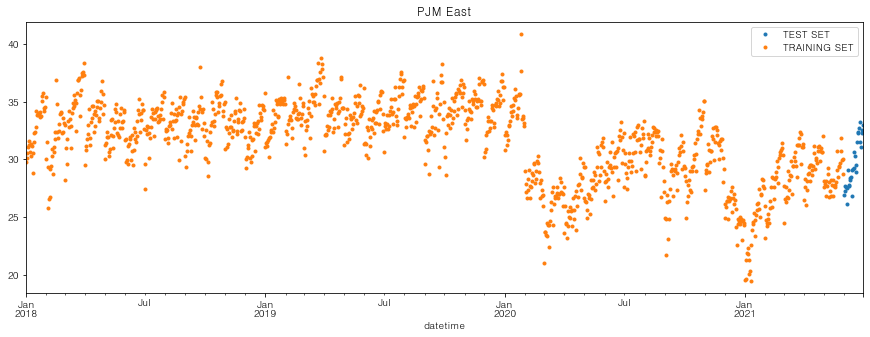

 45%|█████████████████████████████████████                                             | 19/42 [00:09<00:10,  2.12it/s]

영천동


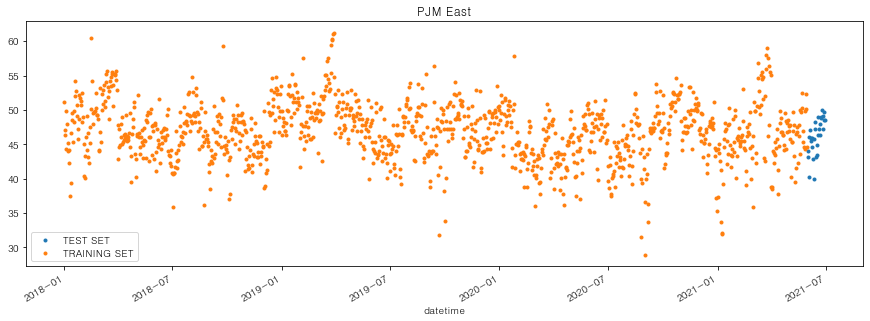

 48%|███████████████████████████████████████                                           | 20/42 [00:09<00:10,  2.07it/s]

예래동


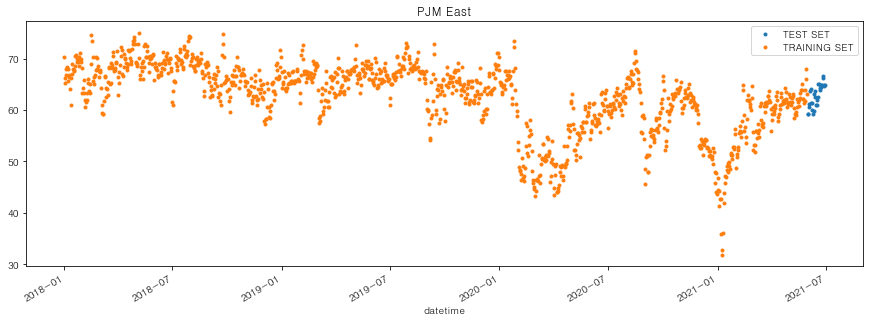

 50%|█████████████████████████████████████████                                         | 21/42 [00:09<00:09,  2.15it/s]

오라동


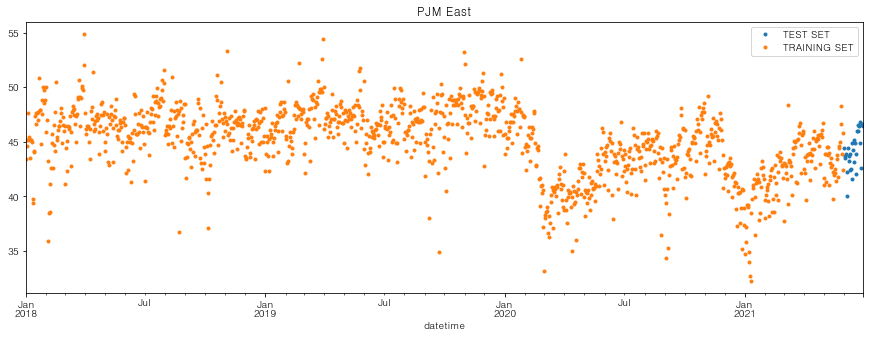

 52%|██████████████████████████████████████████▉                                       | 22/42 [00:10<00:09,  2.08it/s]

외도동


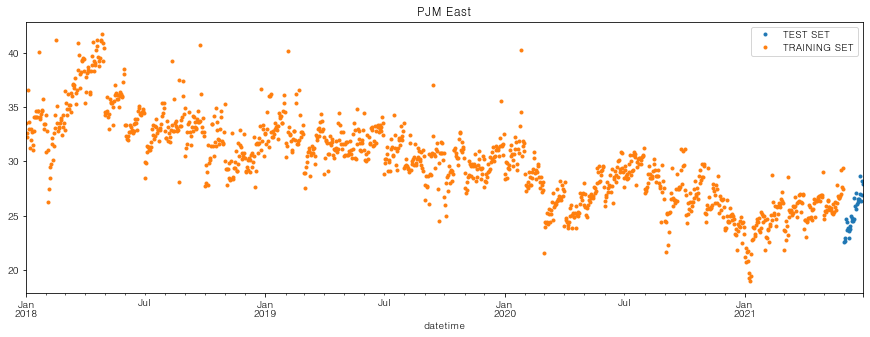

 55%|████████████████████████████████████████████▉                                     | 23/42 [00:10<00:09,  2.04it/s]

용담1동


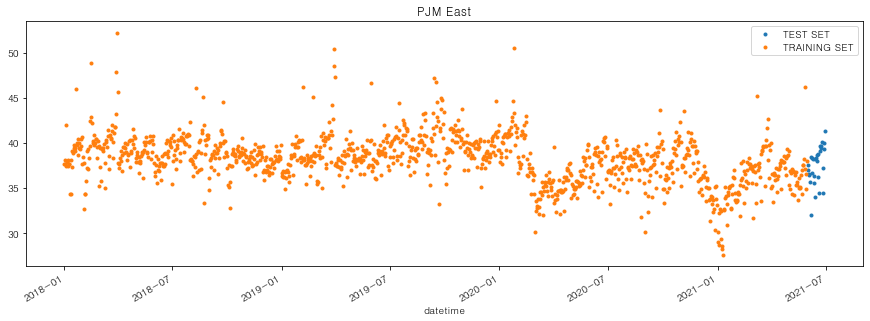

 57%|██████████████████████████████████████████████▊                                   | 24/42 [00:11<00:08,  2.14it/s]

용담2동


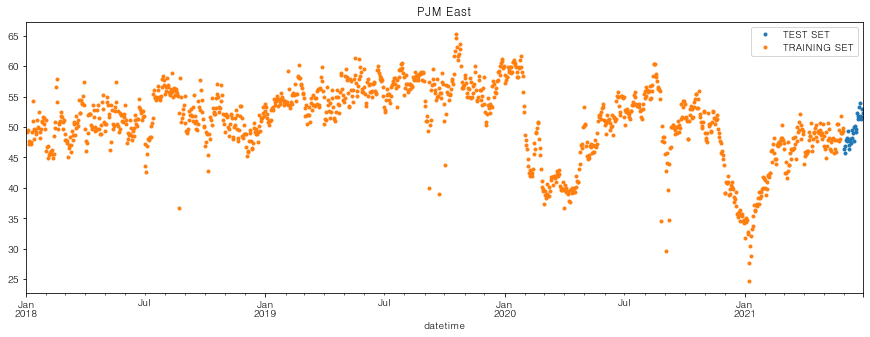

 60%|████████████████████████████████████████████████▊                                 | 25/42 [00:11<00:08,  2.03it/s]

이도1동


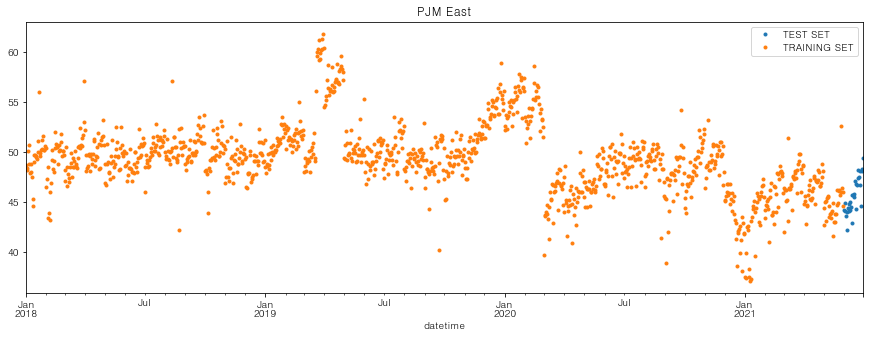

 62%|██████████████████████████████████████████████████▊                               | 26/42 [00:12<00:07,  2.01it/s]

이도2동


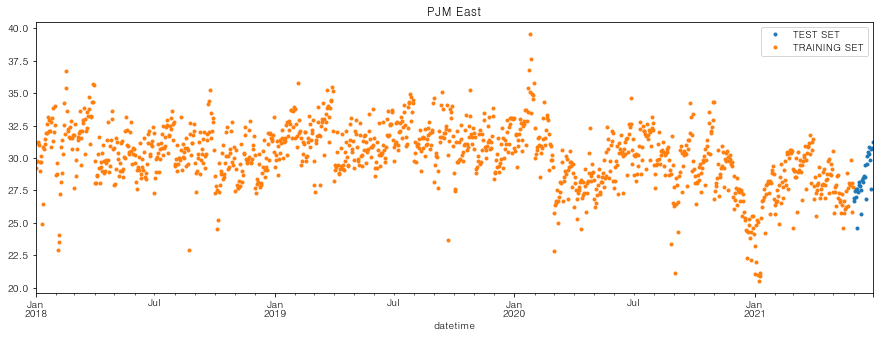

 64%|████████████████████████████████████████████████████▋                             | 27/42 [00:13<00:08,  1.85it/s]

이호동


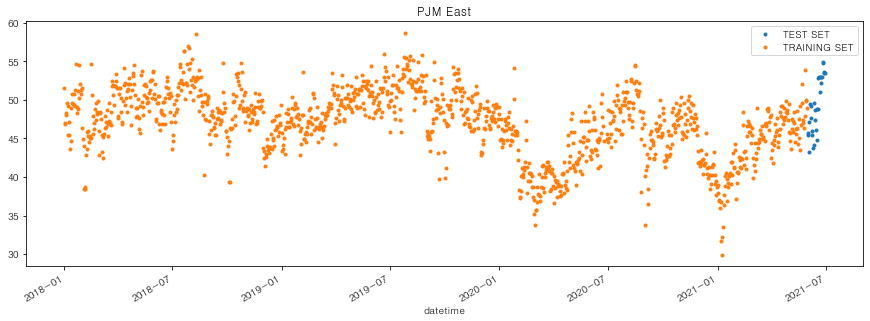

 67%|██████████████████████████████████████████████████████▋                           | 28/42 [00:13<00:07,  1.99it/s]

일도1동


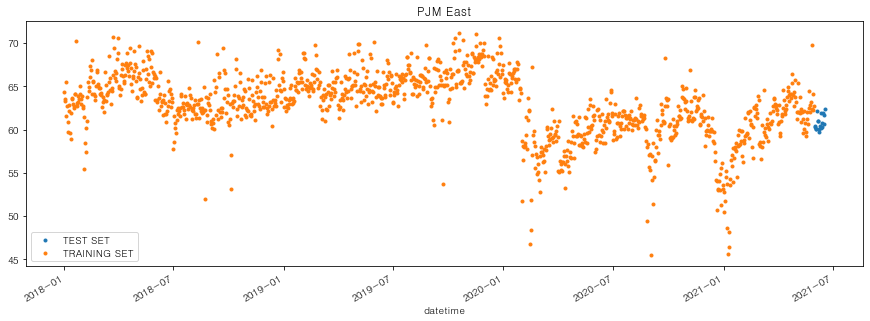

 69%|████████████████████████████████████████████████████████▌                         | 29/42 [00:13<00:06,  2.09it/s]

일도2동


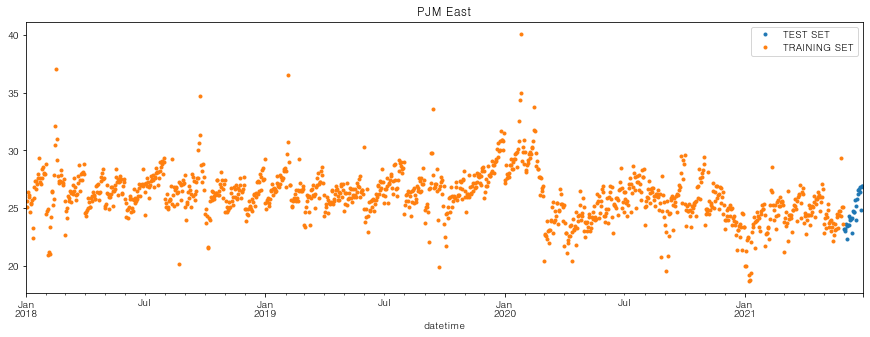

 71%|██████████████████████████████████████████████████████████▌                       | 30/42 [00:14<00:05,  2.05it/s]

정방동


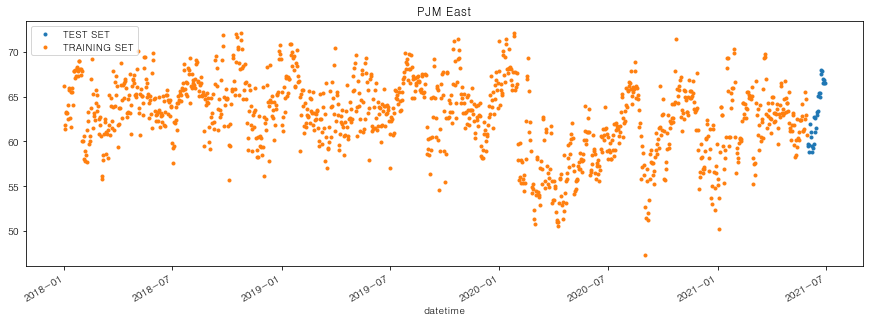

 74%|████████████████████████████████████████████████████████████▌                     | 31/42 [00:14<00:05,  2.14it/s]

중문동


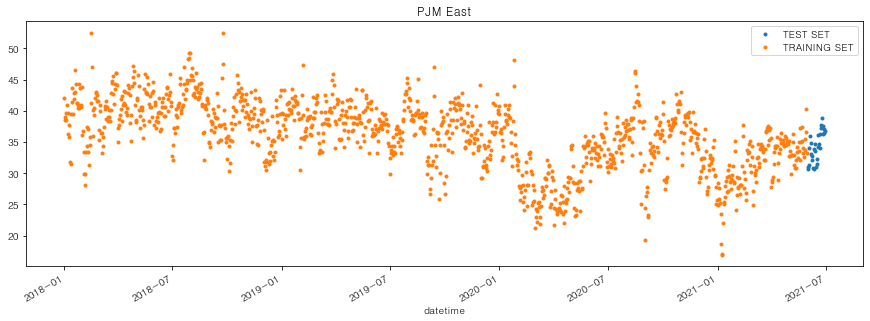

 76%|██████████████████████████████████████████████████████████████▍                   | 32/42 [00:15<00:04,  2.20it/s]

중앙동


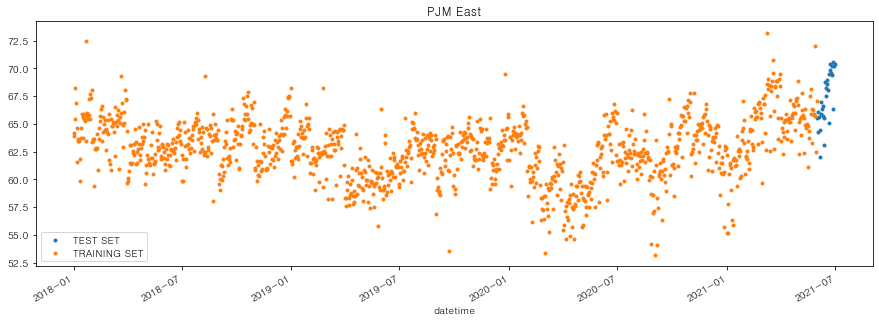

 79%|████████████████████████████████████████████████████████████████▍                 | 33/42 [00:15<00:04,  2.21it/s]

천지동


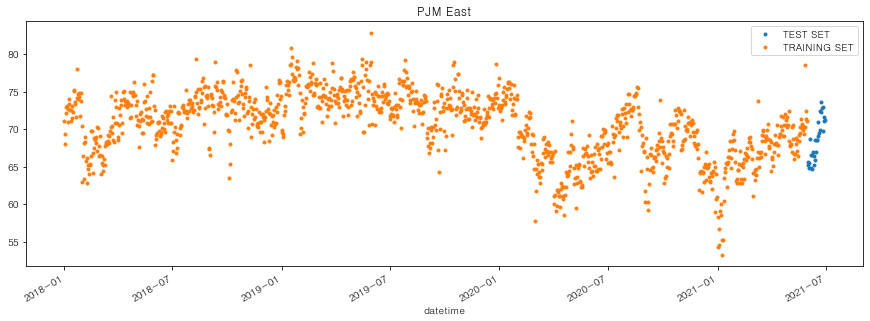

 81%|██████████████████████████████████████████████████████████████████▍               | 34/42 [00:16<00:03,  2.26it/s]

표선면


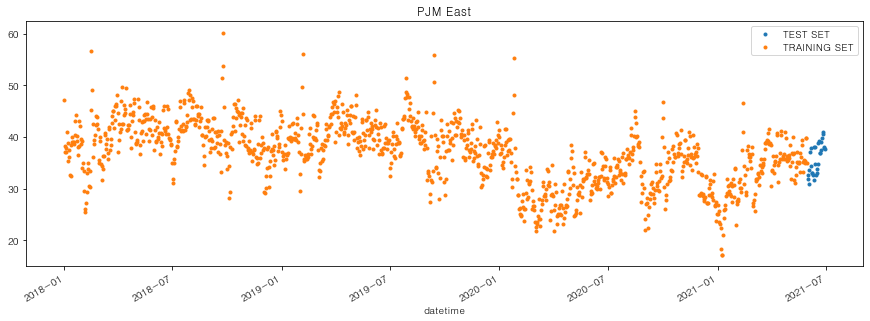

 83%|████████████████████████████████████████████████████████████████████▎             | 35/42 [00:16<00:03,  2.31it/s]

화북동


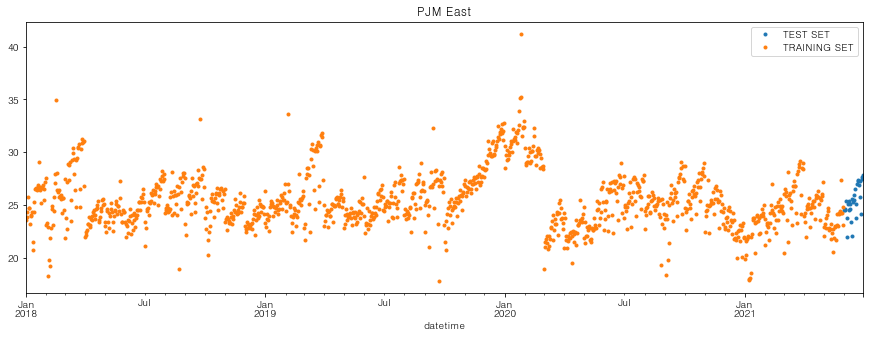

 86%|██████████████████████████████████████████████████████████████████████▎           | 36/42 [00:17<00:02,  2.07it/s]

효돈동


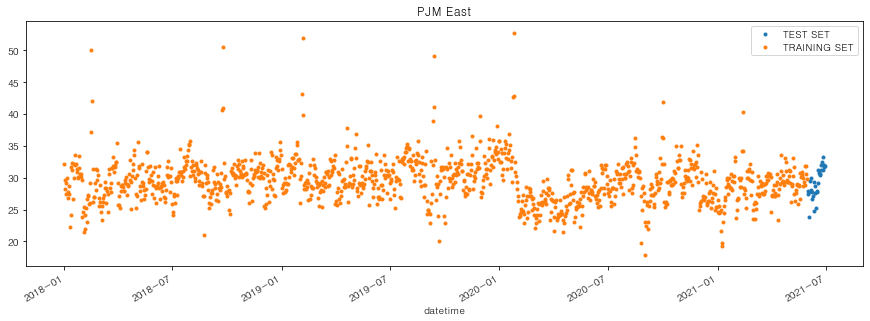

 88%|████████████████████████████████████████████████████████████████████████▏         | 37/42 [00:17<00:02,  2.15it/s]

전체


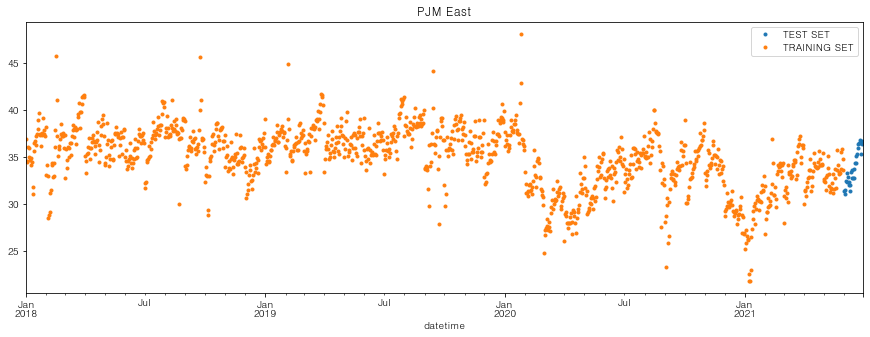

 90%|██████████████████████████████████████████████████████████████████████████▏       | 38/42 [00:18<00:01,  2.09it/s]

조천읍


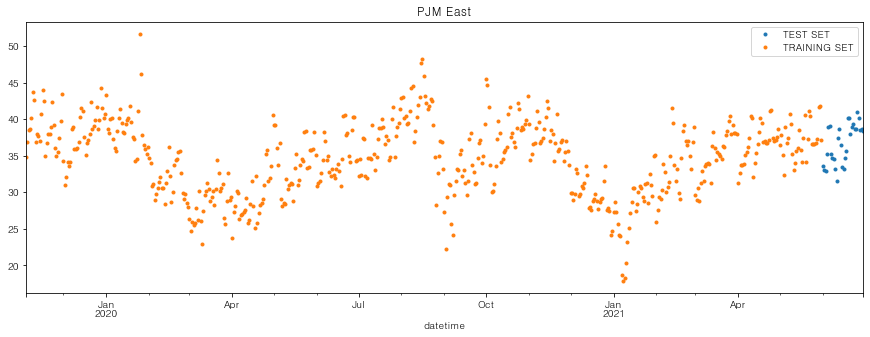

 93%|████████████████████████████████████████████████████████████████████████████▏     | 39/42 [00:18<00:01,  2.22it/s]

구좌읍


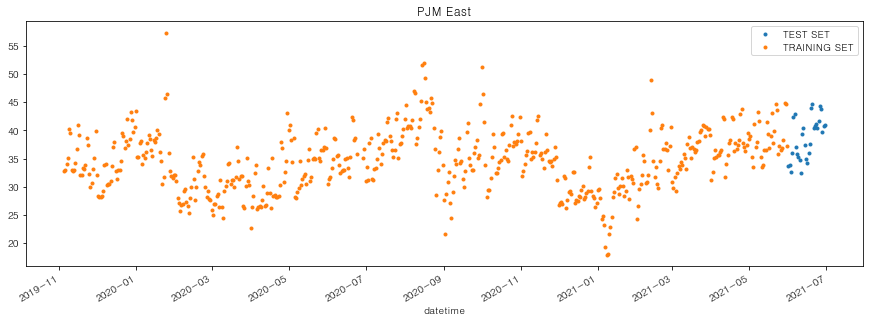

 95%|██████████████████████████████████████████████████████████████████████████████    | 40/42 [00:18<00:00,  2.24it/s]

한림읍


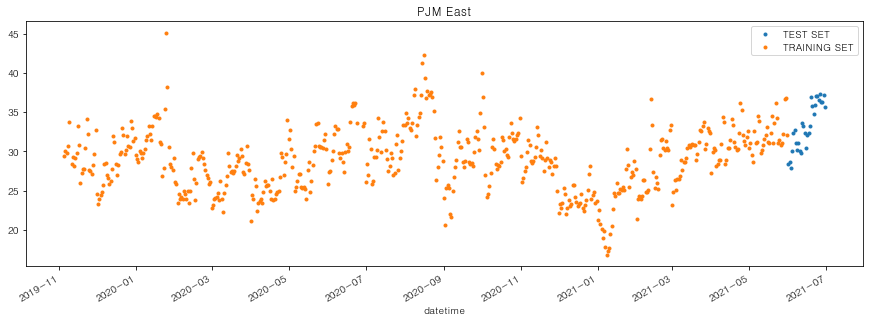

 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:19<00:00,  2.30it/s]

한경면


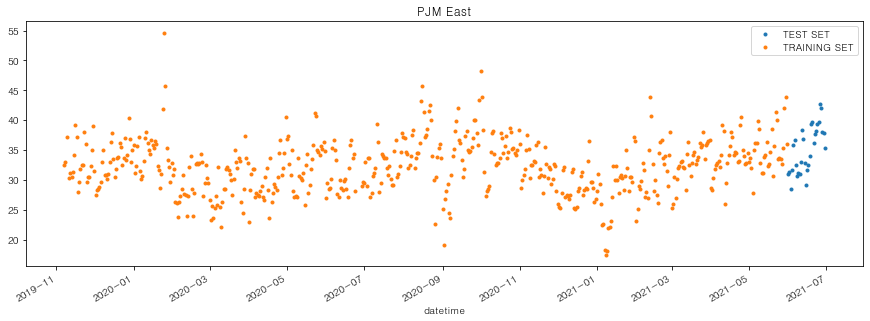

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:19<00:00,  2.13it/s]


In [179]:
# plot train and test so you can see where we have split

split_date = '2021-05-31'

for i in tqdm(df.emd_nm.unique()):
    print(i)
    a = df[df.emd_nm == i]
    a_train = a.loc[a.index <= split_date].copy()
    a_test = a.loc[a.index > split_date].copy()
    # Plot train and test so you can see where we have split
    a_test \
          .rename(columns={'visit_ratio': 'TEST SET'}) \
        .join(a_train.rename(columns={'visit_ratio': 'TRAINING SET'}),
          how='outer',  lsuffix='_left', rsuffix='_right') \
    .plot(figsize=(15,5), title='PJM East', style='.')
    plt.show()
    

In [181]:
# simple prophet
# test

b = df[df.emd_nm == df.emd_nm.unique()[0]]


split_date = '2021-05-31'
b_train = b.loc[b.index <= split_date].copy()
b_test = b.loc[b.index > split_date].copy()

,ds,emd_nm,y
0,2018-01-01,건입동,49.642958
1,2018-01-02,건입동,45.943924
2,2018-01-03,건입동,45.064675
3,2018-01-04,건입동,46.932088
4,2018-01-05,건입동,45.995188


In [183]:
# Setup and train model and fit
model = Prophet()
model.fit(pjme_train.reset_index() \
              .rename(columns={'Datetime':'ds',
                               'PJME_MW':'y'}))

NameError: name 'Prophet' is not defined